In [2]:
from sklearn import *
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('gbm-data.csv', engine = 'python')

In [7]:
data = df.values

In [14]:
y = data[:, 0]
X = data[:, 1:]

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.8, random_state=241)

In [90]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]

loss_train = np.zeros((len(learning_rate), 250))
loss_test = np.zeros((len(learning_rate), 250))

for i in range(0, len(learning_rate)):

    model = ensemble.GradientBoostingClassifier(n_estimators = 250, learning_rate = learning_rate[i],
                                                verbose= True, random_state = 341)
    
    model.fit(X_train, y_train)
    
    k = 0
    
    for y_pred in model.staged_decision_function(X_train):
        
        prediction_train = 1/(1+np.exp(-y_pred))
        
        loss_train[i, k] = metrics.log_loss(y_train, prediction_train[:, 0])
        
        k += 1
    
    k = 0
    
    for y_pred in model.staged_decision_function(X_test):
        
        prediction_test = 1/(1+np.exp(-y_pred))
        
        loss_test[i, k] = metrics.log_loss(y_test, prediction_test[:, 0])
        
        k += 1

      Iter       Train Loss   Remaining Time 
         1           1.0190           12.21s
         2           0.9246           11.77s
         3           0.8491           11.12s
         4           0.7722           10.70s
         5           0.7069           10.74s
         6           0.6672           10.74s
         7           0.6394           10.59s
         8           0.5763           10.41s
         9           0.5599           10.33s
        10           0.5445           10.39s
        20           0.2747            9.75s
        30           0.1705           10.29s
        40           0.1039            9.76s
        50           0.0682            9.22s
        60           0.0464            8.81s
        70           0.0300            8.29s
        80           0.0198            7.89s
        90           0.0136            7.35s
       100           0.0099            7.69s
       200           0.0004            2.38s
      Iter       Train Loss   Remaining Time 
        

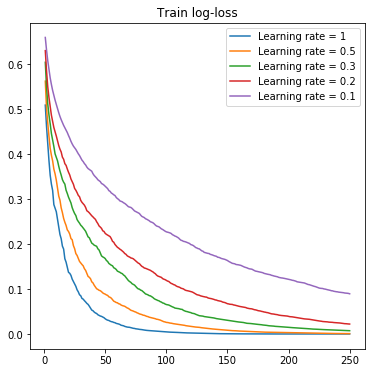

In [91]:
fig, ax = plt.subplots(figsize = (6, 6))

for i in range(0, len(learning_rate)):

    plt.plot(np.linspace(1, 250, 250), loss_train[i, :], label = 'Learning rate = {}'.format(learning_rate[i]))
    plt.legend()
    plt.title('Train log-loss')

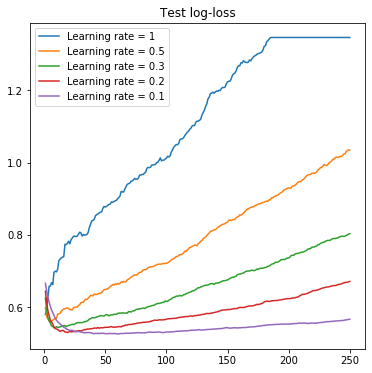

In [92]:
fig, ax = plt.subplots(figsize = (6, 6))

for i in range(0, len(learning_rate)):

    plt.plot(np.linspace(1, 250, 250), loss_test[i, :], label = 'Learning rate = {}'.format(learning_rate[i]))
    plt.legend()
    plt.title('Test log-loss')

In [110]:
forest = ensemble.RandomForestClassifier(n_estimators = 19, random_state = 241)

In [111]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=241,
                       verbose=0, warm_start=False)

In [112]:
loss = metrics.log_loss(y_test, forest.predict_proba(X_test))

In [113]:
loss

0.5996277981242936

In [114]:
round(loss, 2)

0.6

In [109]:
np.argmin(loss_test)

1060